# Ensemble Methods Exercise (5 points)

Import the file `planes.csv` from the data folder as a pandas dataframe called features. The dataset has information about different types of airplanes, including the number of tails, year of production, type, manufacturer, model, number of engines, seat, speed, and engine type. 

In this exercise, we are going to train a classifier to predict the engine type based on the provided information.

In [1]:
# Your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
%matplotlib inline
pd.option_context('display.max_columns',None)
features = pd.read_csv('data/planes.csv')
features

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan
...,...,...,...,...,...,...,...,...,...
3317,N997AT,2002.0,Fixed wing multi engine,BOEING,717-200,2,100,NaN,Turbo-fan
3318,N997DL,1992.0,Fixed wing multi engine,MCDONNELL DOUGLAS AIRCRAFT CO,MD-88,2,142,NaN,Turbo-fan
3319,N998AT,2002.0,Fixed wing multi engine,BOEING,717-200,2,100,NaN,Turbo-fan
3320,N998DL,1992.0,Fixed wing multi engine,MCDONNELL DOUGLAS CORPORATION,MD-88,2,142,NaN,Turbo-jet


## Exploratory Data Analysis

Perform a brief Exploratory Data Analysis. Display summary statistics, handle missing values (if the number of missing values is less than 100 remove those rows), if needed remove unnecessary columns, check the data distribution, and report if there are correlated features.

,year,engines,seats,speed
count,3252.000000,3322.000000,3322.000000,23.000000
mean,2000.484010,1.995184,154.316376,236.782609
std,7.193425,0.117593,73.654974,149.759794
min,1956.000000,1.000000,2.000000,90.000000
25%,1997.000000,2.000000,140.000000,107.500000
50%,2001.000000,2.000000,149.000000,162.000000
75%,2005.000000,2.000000,182.000000,432.000000
max,2013.000000,4.000000,450.000000,432.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tailnum       3322 non-null   object 
 1   year          3252 non-null   float64
 2   type          3322 non-null   object 
 3   manufacturer  3322 non-null   object 
 4   model         3322 non-null   object 
 5   engines       3322 non-null   int64  
 6   seats         3322 non-null   int64  
 7   speed         23 non-null     float64
 8   engine        3322 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 233.7+ KB
None
Missing values before
tailnum            0
year              70
type               0
manufacturer       0
model              0
engines            0
seats              0
speed           3299
engine             0
dtype: int64
Missing values after
tailnum            0
year               0
type               0
manufacturer       0
model              0
en

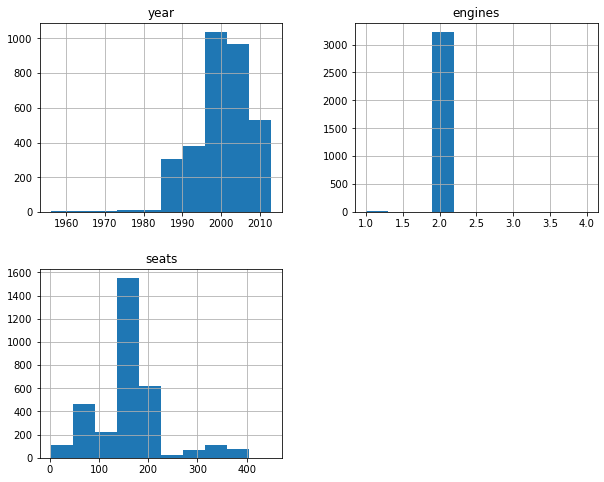

Bar plot of object features


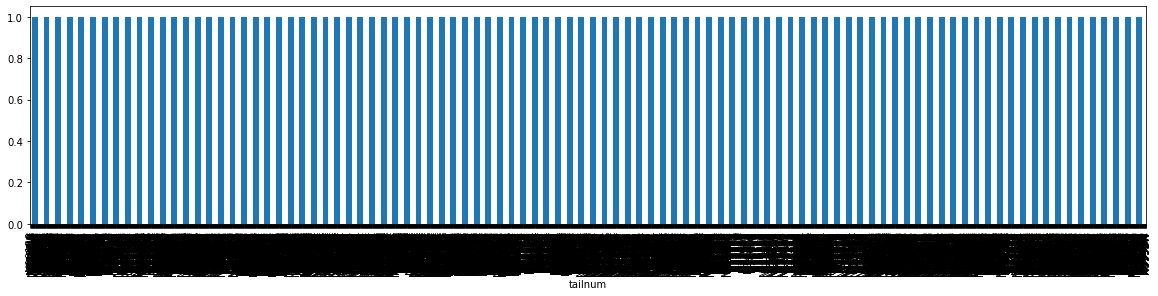

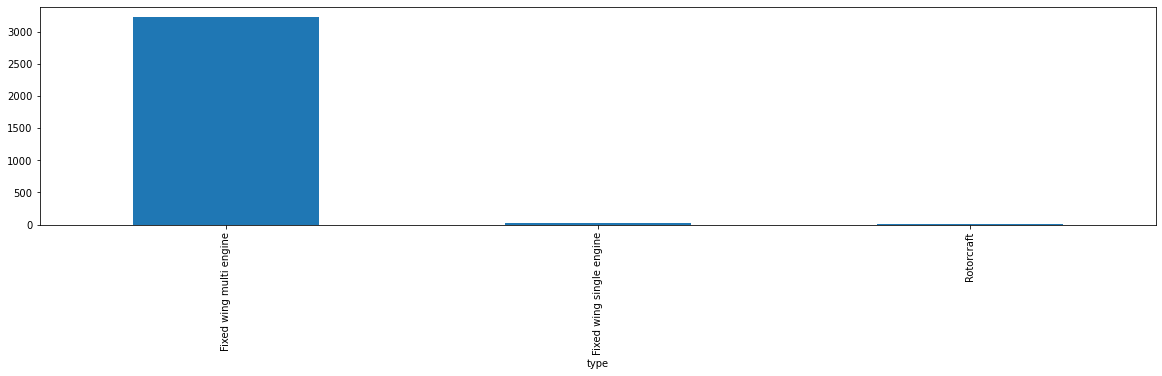

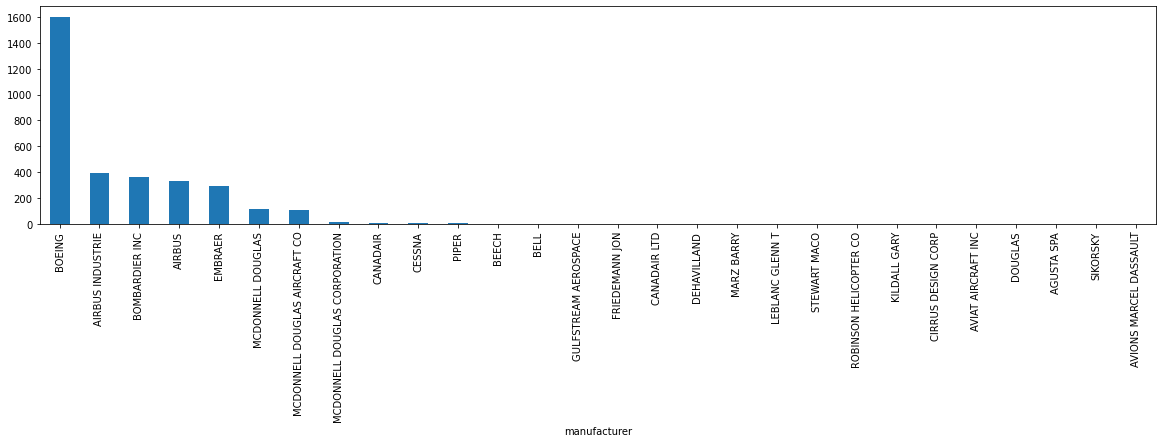

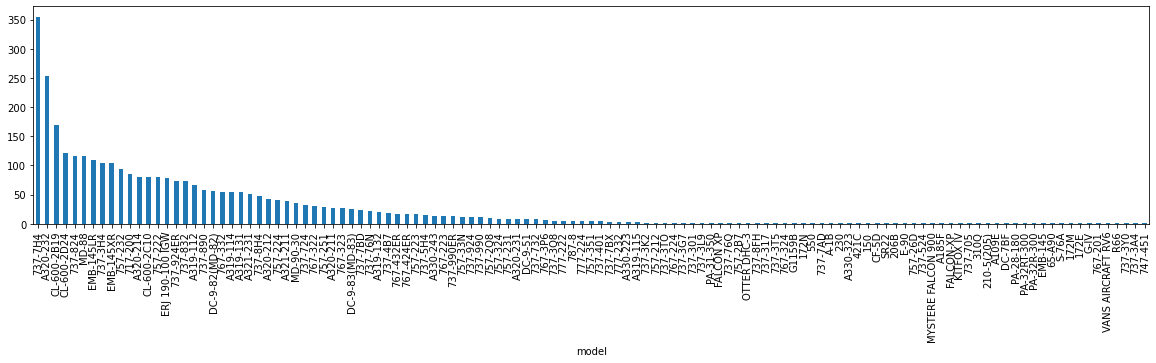

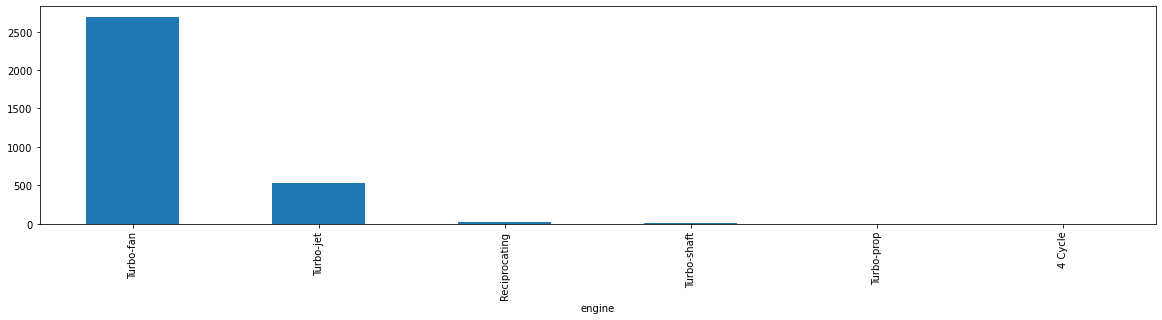

Correlation map


<AxesSubplot:>

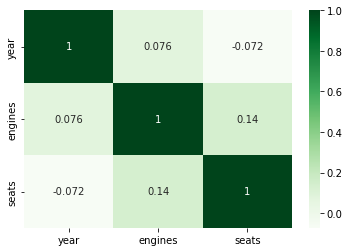

In [2]:
# Your code here
#Displaying summary statistics
display(features.describe())
#Handling missing values
print(features.info())
print("Missing values before")
print(features.isna().sum())
#year has less than 100 missing values so those rows can be removed
features.dropna(subset = ['year'], inplace = True)
print("Missing values after")
print(features.isna().sum())
#speed has too many missing values so this column can be dropped
print("Missing values before dropping column")
print(features.isna().sum())
features.drop(columns = ['speed'], inplace = True)
print("Missing values after dropping column")
print(features.isna().sum())
#Data distribution
print("Histogram plot of numeric features")
features.hist(figsize = (10,8))
plt.show()
print("Bar plot of object features")
for column in features.columns:
    if features[column].dtype=='object':
        fig = plt.figure(figsize=(20, 4))
        features[column].value_counts().plot(kind='bar',x=column)
        plt.xlabel(column)
        plt.show()
#engines seem to have the same value for most of the dataset
#Correlation
print("Correlation map")
sns.heatmap(features.corr(), cmap="Greens", annot=True)
#None of the numerical features seem strongly correlated.

#Column 'year' should be a python datetime object if we were doing time series analysis
#but we are not doing a time series analysis we instead convert it to categorical
#not a float to be properly considered by the model.
#features['year'] = pd.Categorical(features.year)
#print("Column types after 'year' has been converted to categorical")
#print(features.info())
#display(features)

### To avoid the error: "ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.", We need to drop the rows that only have one value belonging to one category.


In [3]:
#Remove the row with the category with a single data sample
features = features[~(features['engine']=='4 Cycle')]
features = features[~(features['engine']=='Turbo-prop')]

## Data Preparation

Encode the categorical features in the dataset into ordinal features using the Ordinal Encoder, use ordinal encoding with the Label Encoder for the column `engine` as target labels, and normalize the data to the range [0,1]. Display the shape of the data and target.

In [4]:
display(features)
print(features.info())
features['engine'].value_counts()

,tailnum,year,type,manufacturer,model,engines,seats,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,Turbo-fan
...,...,...,...,...,...,...,...,...
3317,N997AT,2002.0,Fixed wing multi engine,BOEING,717-200,2,100,Turbo-fan
3318,N997DL,1992.0,Fixed wing multi engine,MCDONNELL DOUGLAS AIRCRAFT CO,MD-88,2,142,Turbo-fan
3319,N998AT,2002.0,Fixed wing multi engine,BOEING,717-200,2,100,Turbo-fan
3320,N998DL,1992.0,Fixed wing multi engine,MCDONNELL DOUGLAS CORPORATION,MD-88,2,142,Turbo-jet


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3249 entries, 0 to 3321
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tailnum       3249 non-null   object 
 1   year          3249 non-null   float64
 2   type          3249 non-null   object 
 3   manufacturer  3249 non-null   object 
 4   model         3249 non-null   object 
 5   engines       3249 non-null   int64  
 6   seats         3249 non-null   int64  
 7   engine        3249 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 228.4+ KB
None


Turbo-fan        2697
Turbo-jet         526
Reciprocating      21
Turbo-shaft         5
Name: engine, dtype: int64

In [5]:
# Your code here
#Ordinal Encoder is applied on data X
from sklearn.preprocessing import OrdinalEncoder
categs_feats = features[['tailnum', 'type', 'manufacturer', 'model']]
encoder = OrdinalEncoder()
categs_encoded = encoder.fit_transform(categs_feats)
print("Before applying ordinal encoder on data")
display(features.head())
print("Columns on which Ordnial encoder is applied: ['tailnum', 'type', 'manufacturer', 'model']")
features[['tailnum', 'type', 'manufacturer', 'model']] = pd.DataFrame(categs_encoded, columns=categs_feats.columns, index=categs_feats.index)
print("After applying ordinal encoder on data")
display(features.head())

#Label Encoder is applied on the target variable y
from sklearn.preprocessing import LabelEncoder
embtown_feat = features[['engine']]
label_encoder = LabelEncoder()
embtown_encoded = label_encoder.fit_transform(embtown_feat)
print("Before applying Label encoder on data")
display(features['engine'].head())
print("Columns on which Ordnial encoder is applied: ['engine']")
features['engine'] = pd.DataFrame(embtown_encoded, columns=embtown_feat.columns, index=embtown_feat.index)
print("After Label encoder on target")
display(features['engine'].head())

X = features.drop(columns = ['engine'])
y = features['engine']
print("Data X and y are separated:")
display(X)
print("Target")
display(y)
print("counts=",y.value_counts())

print("Statistics before Normalization")
display(X.describe())
#Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled= scaler.fit_transform(X)
print("Statistics after Normalization")
display(pd.DataFrame(X_scaled, columns=X.columns).describe())

Before applying ordinal encoder on data


,tailnum,year,type,manufacturer,model,engines,seats,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,Turbo-fan


Columns on which Ordnial encoder is applied: ['tailnum', 'type', 'manufacturer', 'model']
After applying ordinal encoder on data


,tailnum,year,type,manufacturer,model,engines,seats,engine
0,0.0,2004.0,0.0,14.0,99.0,2,55,Turbo-fan
1,1.0,1998.0,0.0,2.0,81.0,2,182,Turbo-fan
2,2.0,1999.0,0.0,2.0,81.0,2,182,Turbo-fan
3,3.0,1999.0,0.0,2.0,81.0,2,182,Turbo-fan
4,4.0,2002.0,0.0,14.0,98.0,2,55,Turbo-fan


Before applying Label encoder on data


/usr/lib/python3/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0    Turbo-fan
1    Turbo-fan
2    Turbo-fan
3    Turbo-fan
4    Turbo-fan
Name: engine, dtype: object

Columns on which Ordnial encoder is applied: ['engine']
After Label encoder on target


0    1
1    1
2    1
3    1
4    1
Name: engine, dtype: int64

Data X and y are separated:


,tailnum,year,type,manufacturer,model,engines,seats
0,0.0,2004.0,0.0,14.0,99.0,2,55
1,1.0,1998.0,0.0,2.0,81.0,2,182
2,2.0,1999.0,0.0,2.0,81.0,2,182
3,3.0,1999.0,0.0,2.0,81.0,2,182
4,4.0,2002.0,0.0,14.0,98.0,2,55
...,...,...,...,...,...,...,...
3317,3244.0,2002.0,0.0,6.0,9.0,2,100
3318,3245.0,1992.0,0.0,21.0,106.0,2,142
3319,3246.0,2002.0,0.0,6.0,9.0,2,100
3320,3247.0,1992.0,0.0,22.0,106.0,2,142


Target


0       1
1       1
2       1
3       1
4       1
       ..
3317    1
3318    1
3319    1
3320    2
3321    2
Name: engine, Length: 3249, dtype: int64

counts= 1    2697
2     526
0      21
3       5
Name: engine, dtype: int64
Statistics before Normalization


,tailnum,year,type,manufacturer,model,engines,seats
count,3249.000000,3249.000000,3249.000000,3249.000000,3249.000000,3249.000000,3249.000000
mean,1624.000000,2000.510926,0.008002,6.973838,63.563558,1.997230,154.899046
std,938.049839,7.141253,0.104975,5.071738,29.052521,0.100759,73.212826
min,0.000000,1956.000000,0.000000,0.000000,0.000000,1.000000,2.000000
25%,812.000000,1997.000000,0.000000,6.000000,34.000000,2.000000,140.000000
50%,1624.000000,2001.000000,0.000000,6.000000,74.000000,2.000000,149.000000
75%,2436.000000,2005.000000,0.000000,7.000000,90.000000,2.000000,182.000000
max,3248.000000,2013.000000,2.000000,26.000000,117.000000,4.000000,450.000000


Statistics after Normalization


,tailnum,year,type,manufacturer,model,engines,seats
count,3249.000000,3249.000000,3249.000000,3249.000000,3249.000000,3249.000000,3249.000000
mean,0.500000,0.780893,0.004001,0.268225,0.543278,0.332410,0.341293
std,0.288808,0.125285,0.052487,0.195067,0.248312,0.033586,0.163421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.719298,0.000000,0.230769,0.290598,0.333333,0.308036
50%,0.500000,0.789474,0.000000,0.230769,0.632479,0.333333,0.328125
75%,0.750000,0.859649,0.000000,0.269231,0.769231,0.333333,0.401786
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Voting Ensemble

Train a hard voting ensemble using k-Nearest Neighbors, SVM, and Logistic Regression, and **compare the accuracy of the ensemble to the individual classifiers**.

You can use the default values for the models, you don't need to perform fine-tuning.

Differently from the examples in the lecture notes on Ensemble Methods, use a 5-fold cross-validation. This means that you don't need to split the data into train and test sets, as this will be performed by the cross_validate function in scikit-learn. 

Report the mean and standard distribution of the accuracy scores for the 5-fold cross validation. 

***Use the same approach with 5-fold cross-validation for all models in this exercise***. 

You may get warnings for some of the models, so if you wish you can ignore the warnings with the following lines.

```
import warnings
warnings.filterwarnings('ignore')
```

The knn mean cross-validation accuracy is: 80.486 +/- 4.756
The svm mean cross-validation accuracy is: 81.073 +/- 7.138
The log_reg mean cross-validation accuracy is: 82.058 +/- 4.849


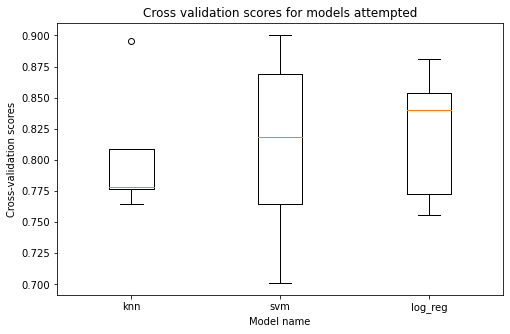

The Hard Voting Classifier mean cross-validation accuracy is: 82.243 +/- 5.652


In [6]:
# Your code here
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

i = 0
scores = []
models = {'knn': KNeighborsClassifier(),
          'svm': SVC(),
          'log_reg': LogisticRegression()}
for model, classifier in models.items():
    cv_5 = KFold(n_splits= 5, random_state= 50)
    cv_result = cross_validate(classifier, X_scaled, y, cv = cv_5)
    scores.append(cv_result["test_score"])
    print("The {} mean cross-validation accuracy is: {:.3f} +/- {:.3f}".format(model, scores[i].mean()*100, scores[i].std()*100))
    i += 1
#Plot accuracy of these models
plt.figure(figsize=(8,5))
plt.boxplot(scores, labels = models.keys())
plt.ylabel("Cross-validation scores")
plt.xlabel("Model name")
plt.title("Cross validation scores for models attempted")
plt.show()


voting_classifier = VotingClassifier(
    estimators=[('knn', KNeighborsClassifier()),
                ('svm', SVC()),
                ('log_reg', LogisticRegression())], 
    voting='hard')
cv_5 = KFold(n_splits= 5, random_state= 50)
cv_result = cross_validate(voting_classifier, X_scaled, y, cv = cv_5)
scores = cv_result["test_score"]
print("The Hard Voting Classifier mean cross-validation accuracy is: {:.3f} +/- {:.3f}".format(scores.mean()*100, scores.std()*100))

Add SGD and Naive Bayes classifiers to the three models above, and report the results of the hard Voting Ensemble with the five individual models. Are there any improvements?

The knn mean cross-validation accuracy is: 80.486 +/- 4.756
The svm mean cross-validation accuracy is: 81.073 +/- 7.138
The log_reg mean cross-validation accuracy is: 82.058 +/- 4.849
The sgd mean cross-validation accuracy is: 83.566 +/- 4.229
The naive_bayes mean cross-validation accuracy is: 83.412 +/- 4.135


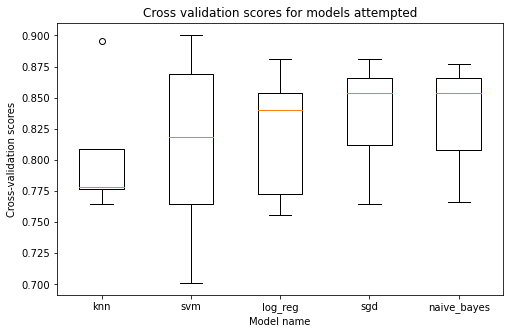

The Hard Voting Classifier mean cross-validation accuracy is: 83.535 +/- 4.246


In [7]:
# Your code here
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
#Adding two models
i = 0
scores = []
models = {'knn': KNeighborsClassifier(),
          'svm': SVC(),
          'log_reg': LogisticRegression(),
          'sgd': SGDClassifier(),
          'naive_bayes': GaussianNB()}
for model, classifier in models.items():
    cv_5 = KFold(n_splits= 5, random_state= 50)
    cv_result = cross_validate(classifier, X_scaled, y, cv = cv_5)
    scores.append(cv_result["test_score"])
    print("The {} mean cross-validation accuracy is: {:.3f} +/- {:.3f}".format(model, scores[i].mean()*100, scores[i].std()*100))
    i += 1
#Plot accuracy of these models
plt.figure(figsize=(8,5))
plt.boxplot(scores, labels = models.keys())
plt.ylabel("Cross-validation scores")
plt.xlabel("Model name")
plt.title("Cross validation scores for models attempted")
plt.show()


voting_classifier = VotingClassifier(
    estimators=[('knn', KNeighborsClassifier()),
                ('svm', SVC()),
                ('log_reg', LogisticRegression()),
                ('sgd', SGDClassifier()),
                ('naive_bayes', GaussianNB())], 
    voting='hard')
cv_5 = KFold(n_splits= 5, random_state= 50)
cv_result = cross_validate(voting_classifier, X_scaled, y, cv = cv_5)
scores = cv_result["test_score"]
print("The Hard Voting Classifier mean cross-validation accuracy is: {:.3f} +/- {:.3f}".format(scores.mean()*100, scores.std()*100))

Train a soft Voting Ensemble using 3 individual models of your choice, and compare the results to the hard Voting Ensemble model. Are the results as expected?

In [8]:
# Your code here
#Soft Voting
voting_classifier = VotingClassifier(
    estimators=[('log_reg', LogisticRegression()),
                ('knn', KNeighborsClassifier()),
                ('naive_bayes', GaussianNB())], 
    voting='soft')
cv_5 = KFold(n_splits= 5, random_state= 50)
cv_result = cross_validate(voting_classifier, X_scaled, y, cv = cv_5)
scores = cv_result["test_score"]
print("The Soft Voting Classifier mean cross-validation accuracy is: {:.3f} +/- {:.3f}".format(scores.mean()*100, scores.std()*100))

'''Soft voting generally achieves better performance than hard voting, 
because it assigns higher weight to the 
predictions by the individual models with high confidence. 
In this case soft voting does almost as good with only 3 estimators as the hard voting does with 5 estimators.
And that is what we have observed.'''

The Soft Voting Classifier mean cross-validation accuracy is: 83.135 +/- 4.674


'Soft voting generally achieves better performance than hard voting, \nbecause it assigns higher weight to the \npredictions by the individual models with high confidence. \nIn this case soft voting does almost as good with only 3 estimators as the hard voting does with 5 estimators.\nAnd that is what we have observed.'

## Bagging Ensemble

Train two Bagging Ensembles, one with bootstrapping and one with pasting, and compare the results. You can use the same hyperparameters as in the examples in the lecture notes.

The Bagging bootstrap Classifier mean cross-validation accuracy is: 83.287 +/- 4.392
The Bagging pasting Classifier mean cross-validation accuracy is: 84.273 +/- 6.361


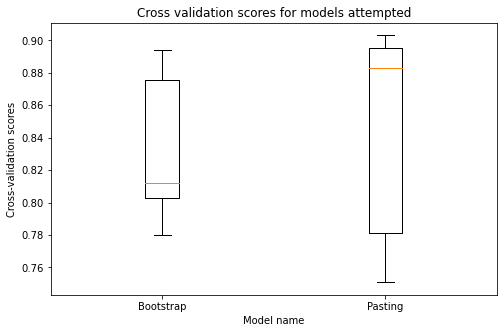

In [9]:
# Your code here
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
scores = []
#Sampled with replacement
bagging_classifier = BaggingClassifier(
      DecisionTreeClassifier(class_weight='balanced'),
    max_samples=0.5, max_features=0.5, bootstrap=True, random_state = 12
)
cv_5 = KFold(n_splits= 5, random_state= 50)
cv_result = cross_validate(bagging_classifier, X_scaled, y, cv = cv_5)
scores.append(cv_result["test_score"])
print("The Bagging bootstrap Classifier mean cross-validation accuracy is: {:.3f} +/- {:.3f}".format(scores[0].mean()*100, scores[0].std()*100))


#Sampled without replacement
bagging_classifier = BaggingClassifier(
      DecisionTreeClassifier(class_weight='balanced'),
    max_samples=0.5, max_features=0.5, bootstrap=False, random_state = 12
)
cv_5 = KFold(n_splits= 5, random_state= 50)
cv_result = cross_validate(bagging_classifier, X_scaled, y, cv = cv_5)
scores.append(cv_result["test_score"])
print("The Bagging pasting Classifier mean cross-validation accuracy is: {:.3f} +/- {:.3f}".format(scores[1].mean()*100, scores[1].std()*100))

#Plot accuracy of these models
plt.figure(figsize=(8,5))
plt.boxplot(scores, labels = ['Bootstrap', 'Pasting'])
plt.ylabel("Cross-validation scores")
plt.xlabel("Model name")
plt.title("Cross validation scores for models attempted")
plt.show()

Perform a grid search for the better of these two ensembles, by using the following percentages of used data instances: 10%, 30%, 50%, 80%, and 100%. 

In [10]:
# Your code here
#Pasting algorithm
bagging_classifier = BaggingClassifier(
      DecisionTreeClassifier(class_weight='balanced')
    , max_features=0.5, bootstrap=False, random_state = 30
)
from sklearn.model_selection import GridSearchCV
# Create grid of hyperparameter values
hyper_grid = {'max_samples': [0.1, 0.3, 0.5, 0.8, 1.0]}

# Tune a knn model using grid search
grid_search = GridSearchCV(bagging_classifier, hyper_grid, scoring='accuracy')
results = grid_search.fit(X_scaled, y)

print('Accuracy:',results.best_score_*100)
print('Hyperparameters:', results.best_params_)

Accuracy: 87.44397297617637
Hyperparameters: {'max_samples': 0.8}


## Boosting Ensemble

Train Boosting Ensembles using Gradient Boosting, AdaBoost, and XGBoost ensembles, and compare the results. Don't forget to use 5-fold cross-validation with all models. 

The grad mean cross-validation accuracy is: 87.350 +/- 1.566
The ada mean cross-validation accuracy is: 77.381 +/- 8.888
The XG mean cross-validation accuracy is: 82.146 +/- 5.543


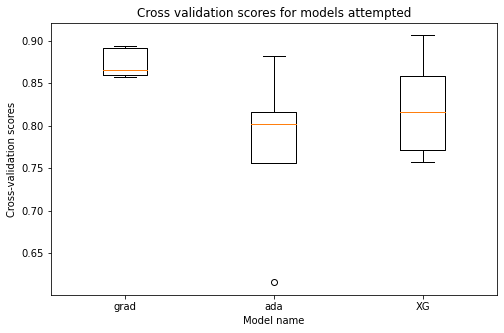

In [11]:
# Your code here
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
i = 0
scores = []
models = {'grad': GradientBoostingClassifier(),
          'ada': AdaBoostClassifier(),
          'XG': XGBClassifier()}
for model, classifier in models.items():
    cv_5 = KFold(n_splits= 5, random_state= 50)
    cv_result = cross_validate(classifier, X_scaled, y, cv = cv_5)
    scores.append(cv_result["test_score"])
    print("The {} mean cross-validation accuracy is: {:.3f} +/- {:.3f}".format(model, scores[i].mean()*100, scores[i].std()*100))
    i += 1
#Plot accuracy of these models
plt.figure(figsize=(8,5))
plt.boxplot(scores, labels = models.keys())
plt.ylabel("Cross-validation scores")
plt.xlabel("Model name")
plt.title("Cross validation scores for models attempted")
plt.show()

#XGBoost seems to perform the best on this data.

## Stacking Ensemble

Train a Stacking Ensemble with Random Forest and SVM Classifier as base estimators, and Logistic Regression as the final estimator. 

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y)
#Normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Your code here
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

base_estimators = [
    ('rand', RandomForestClassifier(random_state=42)),
    ('svc', SVC(random_state=42))]

final_estimator = LogisticRegression()

stack_classifier = StackingClassifier(estimators = base_estimators, 
                               final_estimator = final_estimator)

stack_classifier.fit(X_train_scaled, y_train)
# evaluate
stack_preds = stack_classifier.predict(X_test_scaled)
stack_acc = accuracy_score(y_test, stack_preds)
print('Stacking Ensemble testing accuracy is {0:7.4f} %'.format(stack_acc*100))

#Cross-validation
stack_classifier = StackingClassifier(estimators = base_estimators, 
                               final_estimator = final_estimator)
scores = []
cv_5 = KFold(n_splits= 5, random_state= 50)
cv_result = cross_validate(stack_classifier, X_scaled, y, cv = cv_5)
scores.append(cv_result["test_score"])
print("The Stacking ensemble Classifier mean cross-validation accuracy is: {:.3f} +/- {:.3f}".format(scores[0].mean()*100, scores[0].std()*100))


Stacking Ensemble testing accuracy is 99.2620 %
The Stacking ensemble Classifier mean cross-validation accuracy is: 89.413 +/- 5.301


Train two other Stacking Ensembles using other classifiers of your choice as the final estimator.

In [14]:
# Your code here
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

base_estimators = [
    ('rand', RandomForestClassifier(random_state=123)),
    ('svc', SVC(random_state=123))]

final_estimator = KNeighborsClassifier()

stack_classifier = StackingClassifier(estimators = base_estimators, 
                               final_estimator = final_estimator)

stack_classifier.fit(X_train_scaled, y_train)
# evaluate
stack_preds = stack_classifier.predict(X_test_scaled)
stack_acc = accuracy_score(y_test, stack_preds)
print('Stacking Ensemble test accuracy is {0:7.4f} %'.format(stack_acc*100))

#Cross-validation
stack_classifier = StackingClassifier(estimators = base_estimators, 
                               final_estimator = final_estimator)

cv_5 = KFold(n_splits= 5, random_state= 50)
cv_result = cross_validate(stack_classifier, X_scaled, y, cv = cv_5)
scores.append(cv_result["test_score"])
print("The Stacking ensemble Classifier mean cross-validation accuracy is: {:.3f} +/- {:.3f}".format(scores[1].mean()*100, scores[1].std()*100))


Stacking Ensemble test accuracy is 98.8930 %
The Stacking ensemble Classifier mean cross-validation accuracy is: 83.869 +/- 4.805


Train another Stacking Ensemble with Random Forest and XGBoost as base estimators, and Logistic Regression as the final estimator, and compare the results.

In [15]:
# Your code here
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

base_estimators = [
    ('rand', RandomForestClassifier(random_state=12)),
    ('XG', XGBClassifier(random_state=12))]

final_estimator = LogisticRegression()

stack_classifier = StackingClassifier(estimators = base_estimators, 
                               final_estimator = final_estimator)

stack_classifier.fit(X_train_scaled, y_train)
# evaluate
stack_preds = stack_classifier.predict(X_test_scaled)
stack_acc = accuracy_score(y_test, stack_preds)
print('Stacking Ensemble test accuracy is {0:7.4f} %'.format(stack_acc*100))

#Cross-validation
stack_classifier = StackingClassifier(estimators = base_estimators, 
                               final_estimator = final_estimator)

cv_5 = KFold(n_splits= 5, random_state= 50)
cv_result = cross_validate(stack_classifier, X_scaled, y, cv = cv_5)
scores.append(cv_result["test_score"])
print("The Stacking ensemble Classifier mean cross-validation accuracy is: {:.3f} +/- {:.3f}".format(scores[2].mean()*100, scores[2].std()*100))


Stacking Ensemble test accuracy is 99.0160 %
The Stacking ensemble Classifier mean cross-validation accuracy is: 89.352 +/- 5.250


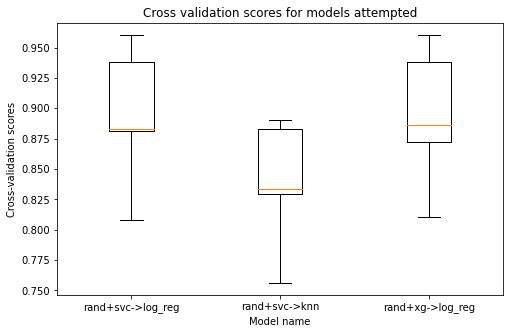

In [16]:
#Plot accuracy of these models
plt.figure(figsize=(8,5))
plt.boxplot(scores, labels = ['rand+svc->log_reg', 'rand+svc->knn', 'rand+xg->log_reg'])
plt.ylabel("Cross-validation scores")
plt.xlabel("Model name")
plt.title("Cross validation scores for models attempted")
plt.show()

### Training accuracy is very similar for all classifers, but cross validation score is best for the first stacking ensemble.